# HW 7

**Upload two files** to Gradescope: 
* `HW7.ipynb` (run all cells to make sure that outputs are visible, especially plots)
* `HW7.py` (which will be autograded)

___

In [1]:
import matplotlib.pyplot as plt

### Binary Search Tree
The code below defines the class **`BST`** which represents a binary search tree containing **`BSTNode`** objects. A `BST` object has the attribute
* `root` which points to the `BSTNode` located at the root of the tree

and a `BSTNode` object has the attributes
* `key`
* `data`
* `parent`
* `left`
* `right`.

In [13]:
class BSTNode:
    '''A node in a binary search tree'''
    def __init__(self, key, satellite):
        self.key = key
        self.data = satellite
        self.parent = None
        self.left = None
        self.right = None
    
    def keys(self):
        key_lst = []
        def inorder_walk(x):
            if x != None:
                inorder_walk(x.left)
                key_lst.append(x.key)
                inorder_walk(x.right)
        inorder_walk(self)
        return key_lst
            
    def search(self, key):
        if self == None or key == self.key:
            return self
        if int(key[4:]) < int(self.key[4:]):
            return self.left.search(key)
        else:
            return self.right.search(key)
        
class BST:
    '''Binary search tree containing BSTNodes'''
    def __init__(self, node):
        self.root = node
    
    def insert(self, node):
        prev = None
        curr = self.root
        while curr != None:
            prev = curr
            if node.key < curr.key:
                curr = curr.left
            else:
                curr = curr.right
        node.parent = prev
        if prev == None:
            self.root = node
        elif node.key < prev.key:
            prev.left = node
        else:
            prev.right = node


Add these `BSTNode` methods:
* **`keys()`** returns a list of the keys in the BST (or subtree) in order starting with the given node. (Do not call a sort routine.)
* **`search(key)`** returns the node corresponding to `key` or returns `None` if `key` is not found. The search begins with the given node and extends to its subtree.


Add this `BST` method:
* **`insert(node)`** inserts a new `BSTNode` into the tree in an appropriate position. No value is returned.

Example:<br>
```
ralph = BSTNode('buff8039', 'Ralphie')
pyth = BSTNode('pyth2022', 'Guido Von Rossum')
marie = BSTNode('macu1234', 'Marie Curie')

tree = BST(ralph)
tree.insert(pyth)
tree.insert(marie)
tree.root.keys(), pyth.search('macu1234').data
```
returns
```
(['buff8039', 'macu1234', 'pyth2022'], 'Marie Curie')
```


In [ ]:
ralph = BSTNode('buff8039', 'Ralphie')
pyth = BSTNode('pyth2022', 'Guido Von Rossum')
marie = BSTNode('macu1234', 'Marie Curie')

tree = BST(ralph)
tree.insert(pyth)
tree.insert(marie)

tree.root.keys(), pyth.search('macu1234').data

Add these `BSTNode` methods:
* **`min()`** returns the node corresponding to the smallest key in the tree or subtree. The given node is the root.
* **`max()`** returns the node corresponding to the largest key in the tree or subtree. The given node is the root.

Add the `BST` method:
* **`successor(node)`** returns the successor to the given node.


In [48]:
class BSTNode(BSTNode):

    def min(self):
        x = self
        while x.left != None:
            x = x.left
        return x
    
    def max(self):
        x = self
        while x.right != None:
            x = x.right
        return x

class BST(BST):

    def successor(self, node):
        k = node
        if node.right != None:
            return node.right.min()
        parent = node.parent
        while parent != None and k == parent.right:
            k = parent
            parent = parent.parent
        return parent

In [22]:
BSTNode(6,1).key

6

In [51]:
tree2 = BST(BSTNode(15,1))
tree2.insert(BSTNode(6,1))
tree2.insert(BSTNode(3,1))
tree2.insert(BSTNode(2,1))
tree2.insert(BSTNode(4,1))
tree2.insert(BSTNode(7,1))
tree2.insert(BSTNode(13,1))
tree2.insert(BSTNode(9,1))
tree2.insert(BSTNode(18,1))
tree2.insert(BSTNode(17,1))
tree2.insert(BSTNode(20,1))

In [52]:
tree2.root.min().key, tree2.root.max().key

(2, 20)

In [56]:
tree2.successor(tree2.root).key

17

### Insertion Sort
Write a function **`insertion_sort(nums)`** that takes a list of numbers and uses the insertion sort algorithm to sort the numbers in place, modifying the `nums` argument. The function does not return a value.

For example,
```
ints = [11, 13, 8, 7, 10]
insertion_sort(ints)
ints
```
displays
```
[7, 8, 10, 11, 13]
```

In [73]:
def insertion_sort(nums):
    for j in range(1,len(nums)):
        key = nums[j]
        i = j - 1
        while i >= 0 and nums[i] > key:
            nums[i + 1] = nums[i]
            i -= 1
        nums[i+1] = key

In [74]:
ints = [11,13,8,7,10]
insertion_sort(ints)
ints

[7, 8, 10, 11, 13]

### Displaying Numbers as Bars
Here is a sample bar chart with labels.

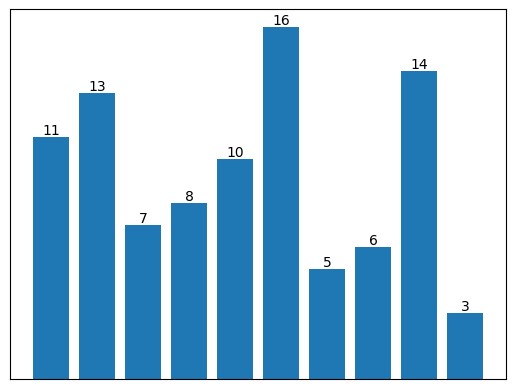

In [150]:
nums = [11, 13, 7, 8, 10, 16, 5, 6, 14, 3]

fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])

bars = ax.bar(range(len(nums)), nums)  
ax.bar_label(bars)
plt.show()

### Insertion Sort Visualization
Write a variation of `insertion_sort` called **`insertion_sort_viz(nums)`** which **displays the numbers as vertical bars** after each key is moved into its ordered position. The number of plots will match the number of elements in `nums`. Use one color for the sorted numbers on the left and a different color for the unsorted numbers on the right. The current `key` should be highlighted in a third color. Below is a sample plot after four iterations.

<img src = "http://www.coloradomath.org/python/insertion_sort_viz.jpg" width="450" height="300" />


In [412]:
def insertion_sort_viz3(nums):
    bars = plt.bar(range(1,len(nums)), nums[1:], color = 'gray')
    bars2 =plt.bar(0,nums[0], color = 'y')
    plt.bar_label(bars)
    plt.bar_label(bars2)
    plt.show()
    for j in range(1, len(nums)):
        key = nums[j]
        i = j - 1
        while i >= 0 and nums[i] > key:
            nums[i + 1] = nums[i]
            i -= 1
        nums[i+1] = key
        bars = plt.bar(range(j+1),nums[:j+1], color = 'b')
        plt.bar_label(bars)
        bars2 = plt.bar(i+1, nums[i+1], color = 'y')
        plt.bar_label(bars2)
        bars3 = plt.bar(range(j+1, len(nums)), nums[j+1:], color = 'gray')
        plt.bar_label(bars3)
        plt.show()
        print(nums)
        

**Run the visualization** on the `nums` list defined below.

In [413]:
nums = [25, 15, 30, 23, 10, 12, 27, 16]

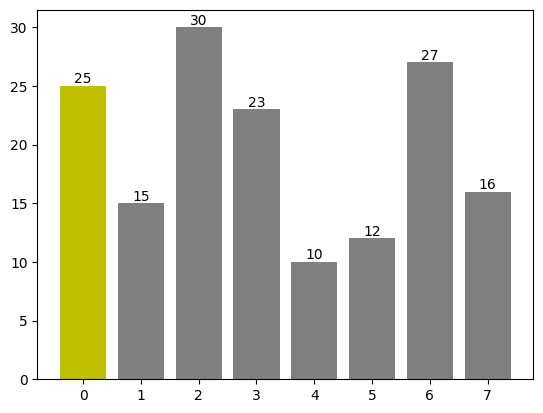

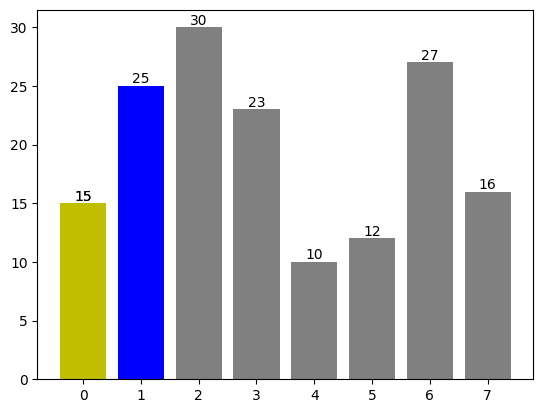

[15, 25, 30, 23, 10, 12, 27, 16]


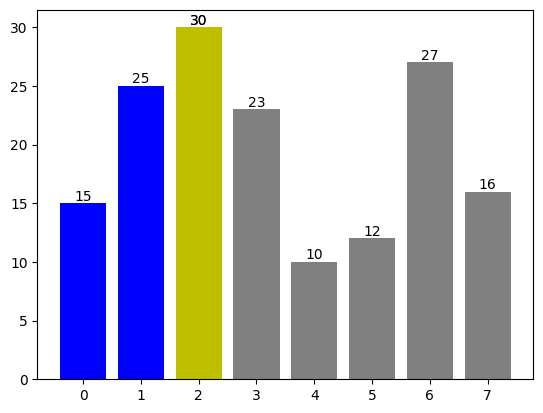

[15, 25, 30, 23, 10, 12, 27, 16]


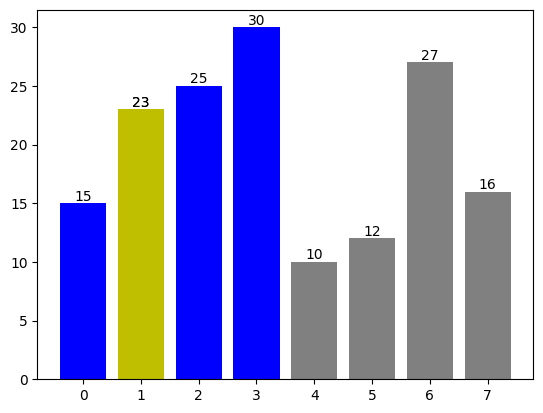

[15, 23, 25, 30, 10, 12, 27, 16]


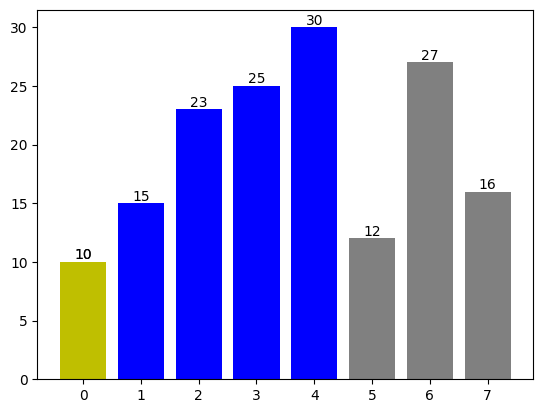

[10, 15, 23, 25, 30, 12, 27, 16]


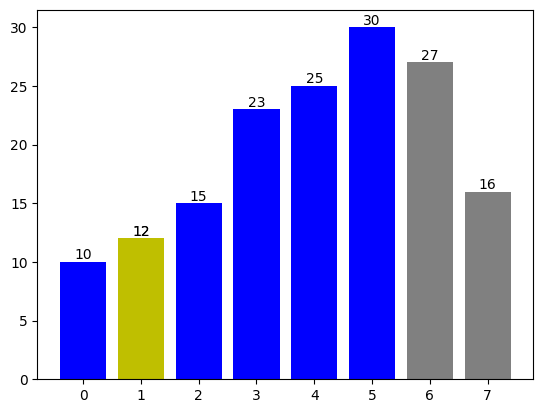

[10, 12, 15, 23, 25, 30, 27, 16]


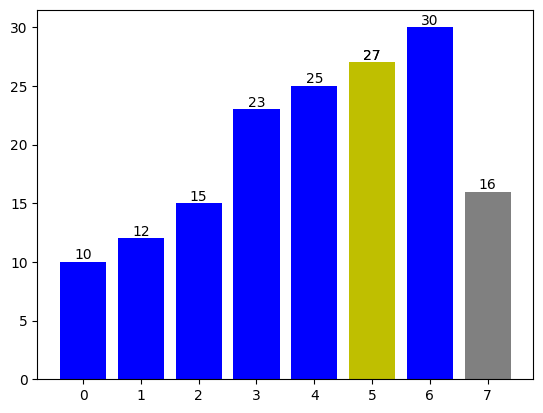

[10, 12, 15, 23, 25, 27, 30, 16]


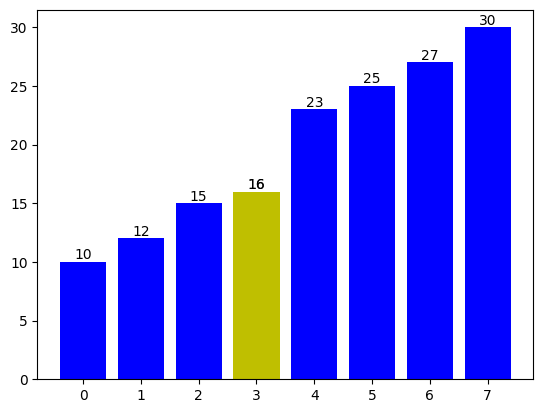

[10, 12, 15, 16, 23, 25, 27, 30]


In [414]:
insertion_sort_viz3(nums)